# Analyse statistique des tableaux 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functools import partial 

from annotathon.utils.customobjs import (
    Path as path,
    objdict as odict
)

from annotathon.parsing.blast import parse_alignment_descriptions as parse_ncbi

In [4]:
%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 8)

In [5]:
data = path("../data")
data.lglob("*")

[PosixPath('../data/phylo'),
 PosixPath('../data/first'),
 PosixPath('../data/landmark-noexclude'),
 PosixPath('../data/landmark'),
 PosixPath('../data/legacy'),
 PosixPath('../data/homologues-par-blast'),
 PosixPath('../data/anthony'),
 PosixPath('../data/sequences'),
 PosixPath('../data/multiple-alignment'),
 PosixPath('../data/nr-5k'),
 PosixPath('../data/domaines-proteiques-interpro')]

In [6]:
blastdir = path("../data/homologues-par-blast/")
blastdir.lglob("*")

[PosixPath('../data/homologues-par-blast/landmark-noexclude'),
 PosixPath('../data/homologues-par-blast/swissprot'),
 PosixPath('../data/homologues-par-blast/default-nr'),
 PosixPath('../data/homologues-par-blast/landmark'),
 PosixPath('../data/homologues-par-blast/5k-nr')]

In [7]:
blast = odict({
    "locations": odict({
        "default": path('../data/homologues-par-blast/default-nr'),
        "cinqk": path('../data/homologues-par-blast/5k-nr'),
        "landmark": path('../data/homologues-par-blast/landmark-noexclude'),
        "sp": path('../data/homologues-par-blast/swissprot'),
        "anthony": path("../data/anthony/")
    }),
    "data": odict({})
})

In [8]:
blast.locations.default.lglob("*.csv")

[PosixPath('../data/homologues-par-blast/default-nr/WA23S6KK013-Alignment-HitTable_par_defaut.csv'),
 PosixPath('../data/homologues-par-blast/default-nr/WA23S6KK013-Alignment-Descriptions_par_defaut.csv')]

In [9]:
blast.locations.cinqk.lglob("*.csv")

[PosixPath('../data/homologues-par-blast/5k-nr/WABSCT7E013-Alignment-HitTable.csv'),
 PosixPath('../data/homologues-par-blast/5k-nr/WABSCT7E013-Alignment-Descriptions.csv')]

In [10]:
blast.locations.landmark.lglob("*.csv")

[PosixPath('../data/homologues-par-blast/landmark-noexclude/WYPZAXHZ013-Alignment-Descriptions.csv')]

In [11]:
blast.locations.sp.lglob("*.csv")

[PosixPath('../data/homologues-par-blast/swissprot/WYS3NEJ6016-Alignment-Descriptions.csv'),
 PosixPath('../data/homologues-par-blast/swissprot/WYS3NEJ6016-Alignment-HitTable.csv')]

In [12]:
blast.locations.anthony.lglob("*.csv")[1]

PosixPath('../data/anthony/align_desc_hypo.csv')

In [13]:
description_glob = "*Alignment-Descriptions*"

In [14]:
lambda glob, dictt: eval(f"")

<function __main__.<lambda>(glob, dictt)>

In [15]:
def add_unkown_description_tag(description: pd.Series) -> pd.Series:
    """  """
    no_species = description.apply(
        lambda x: x if len(x.split("[")) == 1 else np.nan
    ).dropna().index
    
    return description[no_species].apply(
        lambda x: f"{x} [unknown species]" if len(x.split("[")) == 1 else x
    )
    

def add_function(description: pd.Series) -> pd.Series:
    """ Add a function column based on a description column """
    return description.apply(lambda x: x.split("[")[0])


def add_species(description: pd.Series) -> pd.Series:
    """ Add a species column based on a description column """
    return description.apply(lambda x: x.split("[")[1].replace("]", ""))

In [16]:
blast.data.update(odict({
    "default": parse_ncbi(blast.locations.default.lglob(description_glob)[0]),
    "cinqk": parse_ncbi(blast.locations.cinqk.lglob(description_glob)[0]),
    "landmark": parse_ncbi(blast.locations.landmark.lglob(description_glob)[0]),
    "sp": parse_ncbi(blast.locations.sp.lglob(description_glob)[0]),
    "taxo": parse_ncbi(blast.locations.anthony.lglob(description_glob)[0]),
    "hypo": parse_ncbi(blast.locations.anthony.lglob("*.csv")[1])
}))

In [31]:
#blast.data.hypo
list(blast.data.lvalues)[0].Description.apply(lambda x: x if "[" in x else np.nan).dropna()

Series([], Name: Description, dtype: float64)

In [33]:
#blast.data.taxo.loc[:, "Description"] = add_function(blast.data.taxo.Description)
blast.data.taxo.loc[:, "function"] = add_function(blast.data.taxo.Description)
blast.data.taxo.loc[:, "species"] = add_species(blast.data.taxo.Description)

In [35]:
blast.data.cinqk.loc[:, "Description"] = add_function(blast.data.cinqk.Description)
blast.data.cinqk.loc[:, "function"] = add_function(blast.data.cinqk.Description)
blast.data.cinqk.loc[:, "species"] = add_species(blast.data.cinqk.Description)

IndexError: list index out of range

In [32]:
#for key in list(blast.data.lkeys)[0]:
 #   blast.data[key].loc[:, "Description"] = eval(f"add_function(blast.data.{key}.Description)")
  #  blast.data[key].loc[:, "function"] = eval(f"add_function(blast.data.{key}.Description)")
   # blast.data[key].loc[:, "species"] = eval(f"add_species(blast.data.{key}.Description)")

In [23]:
with open("hhypothese.txt", "w") as f:
    for i in blast.data.hypo.Accession.to_list():
        f.write(f"{i}\n")

In [99]:
!pwd

/home/gml/Documents/Master/M1_BIBS/Anal_Seq/Annotathon/workflow


/home/gml/.cache/pypoetry/virtualenvs/annotathon-cID333B3-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gml/.cache/pypoetry/virtualenvs/annotathon-cID333B3-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='E value', ylabel='Density'>

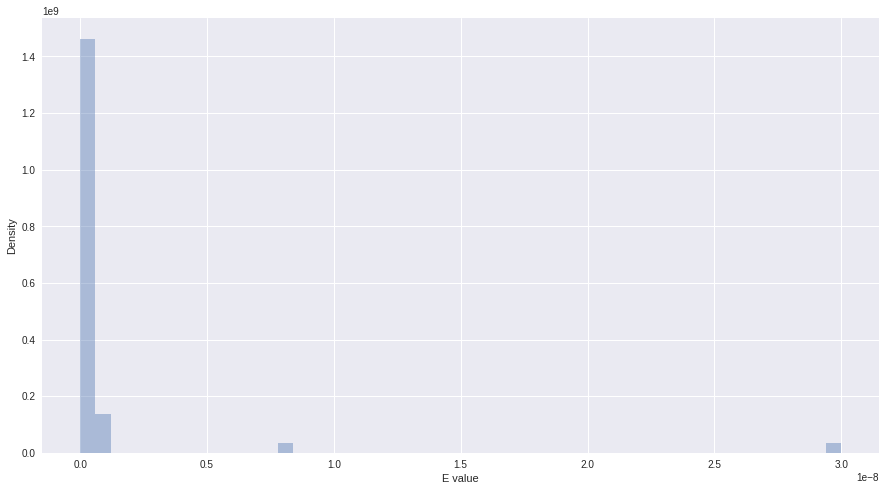

In [50]:
sns.distplot(blast.data.sp["E value"])

In [51]:
def seuil(df, s, colname="E value"):
    tmp = df[ df["E value"] < s ][colname]
    print(len(tmp))
    return tmp

In [71]:
blast.data.sp

,Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession
0,RecName: Full=ATP-dependent DNA helicase RecG ...,Pasteurella multocida subsp. multocida str. Pm70,129.0,129.0,99.0,8.000000e-32,27.62,693,Q9CMB4.1
1,RecName: Full=ATP-dependent DNA helicase RecG ...,Staphylococcus aureus subsp. aureus Mu50,122.0,122.0,98.0,3.000000e-29,27.42,686,P64324.1
2,RecName: Full=ATP-dependent DNA helicase RecG ...,Staphylococcus aureus subsp. aureus NCTC 8325,121.0,121.0,98.0,4.000000e-29,27.42,686,O50581.1
3,RecName: Full=ATP-dependent DNA helicase RecG ...,Aquifex aeolicus VF5,121.0,121.0,98.0,4.000000e-29,28.41,792,O67837.1
4,RecName: Full=ATP-dependent DNA helicase RecG ...,Staphylococcus aureus subsp. aureus MSSA476,120.0,120.0,98.0,9.000000e-29,27.42,686,Q6G9Y6.1
5,RecName: Full=ATP-dependent DNA helicase RecG ...,Haemophilus influenzae Rd KW20,120.0,120.0,99.0,1.000000e-28,27.67,693,P43809.1
6,RecName: Full=ATP-dependent DNA helicase RecG ...,Staphylococcus aureus subsp. aureus MRSA252,118.0,118.0,98.0,4.000000e-28,27.15,686,Q6GHK8.1
7,RecName: Full=ATP-dependent DNA helicase RecG ...,Bacillus subtilis subsp. subtilis str. 168,117.0,117.0,100.0,7.000000e-28,28.45,682,O34942.1
8,RecName: Full=ATP-dependent DNA helicase RecG ...,Staphylococcus epidermidis ATCC 12228,115.0,115.0,98.0,4.000000e-27,26.10,682,Q8CSV3.1
9,RecName: Full=ATP-dependent DNA helicase RecG ...,Staphylococcus epidermidis RP62A,115.0,115.0,98.0,5.000000e-27,26.21,682,Q5HPW4.1


11


/home/gml/.cache/pypoetry/virtualenvs/annotathon-cID333B3-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='E value', ylabel='Count'>

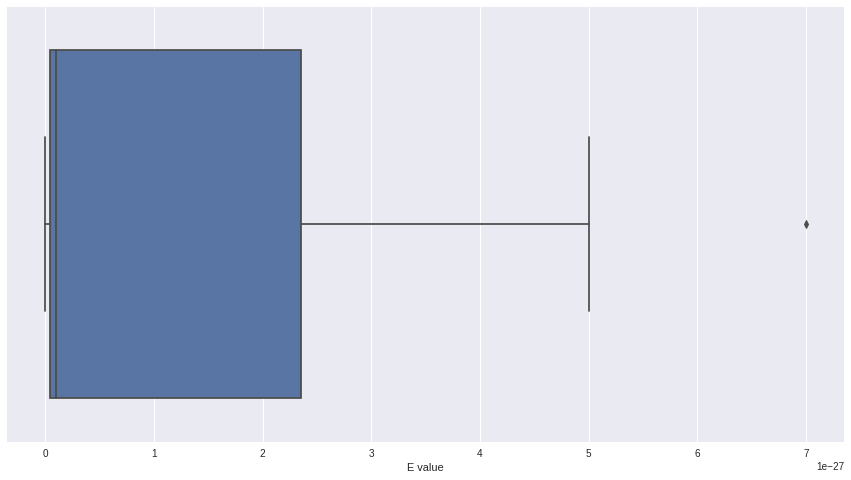

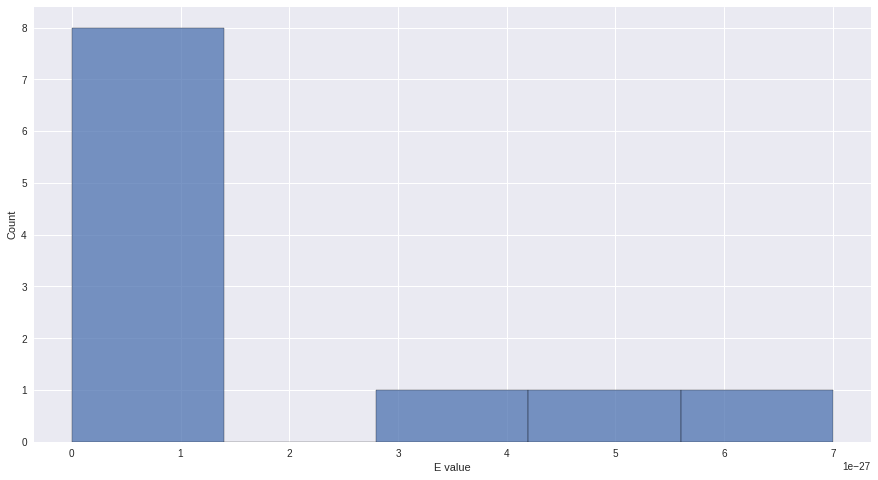

In [67]:
_d = seuil(blast.data.sp, 1e-26)
sns.boxplot(_d)
plt.figure()
sns.histplot(_d)

In [45]:
blast.data.cinqk.loc[:, "Description"] = blast.data.cinqk.Description.apply(lambda x: x.lower())

In [46]:
# find problematic locations : 
no_species = blast.data.cinqk.Description.apply(
    lambda x: x if len(x.split("[")) == 1 else np.nan
).dropna().index
no_species

Int64Index([867, 1560, 2015, 2188, 2298, 2485], dtype='int64')

In [47]:
blast.data.cinqk.loc[no_species, "Description"] = blast.data.cinqk.Description[no_species].apply(
    lambda x: f"{x} [unknown species]" if len(x.split("[")) == 1 else x
)

In [48]:
blast.data.cinqk.loc[:, "function"] = blast.data.cinqk.Description.apply(lambda x: x.split("[")[0])
blast.data.cinqk.loc[:, "species"] = blast.data.cinqk.Description.apply(lambda x: x.split("[")[1].replace("]", ""))

In [84]:
def add_unkown_description_tag(description: pd.Series) -> pd.Series:
    """  """
    no_species = description.apply(
        lambda x: x if len(x.split("[")) == 1 else np.nan
    ).dropna().index
    
    return description[no_species].apply(
        lambda x: f"{x} [unknown species]" if len(x.split("[")) == 1 else x
    )
    

def add_function(description: pd.Series) -> pd.Series:
    """ Add a function column based on a description column """
    return description.apply(lambda x: x.split("[")[0])


def add_species(description: pd.Series) -> pd.Series:
    """ Add a species column based on a description column """
    return description.apply(lambda x: x.split("[")[1].replace("]", ""))

In [55]:
print(blast.data.cinqk.species)

0            gammaproteobacteria bacterium
1            gammaproteobacteria bacterium
2            gammaproteobacteria bacterium
3                        bacterium tmed221
4            gammaproteobacteria bacterium
                       ...                
4995              streptococcus salivarius
4996                neisseria meningitidis
4997    pseudomonas savastanoi pv. fraxini
4998                  enterococcus cecorum
4999                    lactococcus lactis
Name: species, Length: 5000, dtype: object


In [51]:
set(blast.data.cinqk.species.apply(lambda x: x.split(" ")[0]))

{'',
 "'osedax'",
 'abscondita',
 'abyssisolibacter',
 'acetitomaculum',
 'acidimicrobiia',
 'acidithiobacillales',
 'acidobacteria',
 'acinetobacter',
 'actinobacillus',
 'actinobacteria',
 'aeribacillus',
 'aestuariibacter',
 'aestuariirhabdus',
 'agarilytica',
 'aidingimonas',
 'alcaligenaceae',
 'alcaligenes',
 'alcanivorax',
 'algibacter',
 'aliicoccus',
 'aliidiomarina',
 'aliifodinibius',
 'aliiglaciecola',
 'aliikangiella',
 'alkalibacillus',
 'alkalibacterium',
 'alkalihalobacillus',
 'alkalilimnicola',
 'alkaliphilus',
 'allobacillus',
 'alphaproteobacteria',
 'alteribacillus',
 'alteromonadaceae',
 'alteromonas',
 'alysiella',
 'aminicella',
 'amphibacillus',
 'amphritea',
 'anaerofustis',
 'anaerolinea',
 'anaerolineaceae',
 'anaerolineae',
 'anaerolineales',
 'anaerosalibacter',
 'anaerosphaera',
 'aquicella',
 'aquifex',
 'aquificaceae',
 'aquisalibacillus',
 'aquitalea',
 'arenibacter',
 'arenicella',
 'armatimonadetes',
 'avibacterium',
 'azotobacter',
 'bacillaceae',
 

In [25]:
blast.data.cinqk.Description.apply(lambda x: x if 'tmed' in x else np.nan).dropna()

3       atp-dependent dna helicase recg [bacterium tme...
9       hypothetical protein cbe17_02800 [gammaproteob...
36      hypothetical protein cbc38_02430 [gammaproteob...
400     atp-dependent dna helicase recg [gammaproteoba...
751     atp-dependent dna helicase recg [gammaproteoba...
1333    hypothetical protein cbe31_03400 [rhodobactera...
2062    atp-dependent dna helicase recg [gammaproteoba...
2523    atp-dependent dna helicase recg [gammaproteoba...
4498    atp-dependent dna helicase recg [gammaproteoba...
Name: Description, dtype: object

In [32]:
proteines = [
    func for func, frame in blast.data.cinqk.groupby(blast.data.cinqk.function)
    if 'hypo' not in func
]
proteines

['atp-dependent dna helicase ',
 'atp-dependent dna helicase recg ',
 'atp-dependent dna helicase recg (ec ',
 'atp-dependent dna helicase, atp-dependent dna helicase recg ',
 'branch migrating atp-dependent dna helicase involved in dna recombination and repair ',
 'branch migrating atp-dependent dna helicase recg ',
 'dead/deah box helicase ',
 'dead/deah box helicase family protein ',
 'dna helicase ',
 'dna helicase recg ',
 'helicase conserved c-terminal domain protein ',
 'multispecies: atp-dependent dna helicase recg ',
 'nucleic acid-binding domain protein ',
 'putative atp-dependent dna helicase recg ',
 'putative uncharacterized protein ',
 'recg ',
 'recg-like helicase ',
 'tpa: atp-dependent dna helicase recg ',
 'tpa: dead/deah box helicase ',
 'tpa: dna helicase recg ',
 'type iii restriction enzyme, res subunit ',
 'unnamed protein product ']

In [41]:
for org, frame in blast.data.cinqk.groupby('family'):
    print(org)


'osedax' symbiont bacterium rs2_46_30_t18
abscondita terminalis
abyssisolibacter fermentans
acetitomaculum ruminis
acidimicrobiia bacterium
acidithiobacillales bacterium sg8_45
acidobacteria bacterium
acinetobacter
acinetobacter apis
acinetobacter baumannii
acinetobacter baumannii 44362_1
acinetobacter baumannii sdf
acinetobacter baylyi
acinetobacter baylyi adp1
acinetobacter bereziniae
acinetobacter bohemicus
acinetobacter bouvetii
acinetobacter brisouii
acinetobacter calcoaceticus
acinetobacter calcoaceticus/baumannii complex
acinetobacter celticus
acinetobacter chinensis
acinetobacter cumulans
acinetobacter defluvii
acinetobacter gandensis
acinetobacter guerrae
acinetobacter guillouiae
acinetobacter junii
acinetobacter kookii
acinetobacter lactucae
acinetobacter lanii
acinetobacter nectaris
acinetobacter nosocomialis
acinetobacter oleivorans
acinetobacter piscicola
acinetobacter pittii
acinetobacter pragensis
acinetobacter schindleri
acinetobacter seifertii
acinetobacter shaoyiming

ruminiclostridium cellobioparum
ruminiclostridium cellobioparum subsp. termitidis ct1112
ruminiclostridium cellulolyticum
ruminiclostridium hungatei
ruminiclostridium sp.
ruminiclostridium sufflavum
ruminococcaceae bacterium
ruminococcaceae bacterium kh2t8
ruminococcus bicirculans
ruminococcus sp.
ruminococcus sp. af16-50
ruminococcus sp. af18-22
ruminococcus sp. af18-29
ruminococcus sp. af19-15
ruminococcus sp. af21-11
ruminococcus sp. af25-19
ruminococcus sp. af34-12
ruminococcus sp. af37-20
ruminococcus sp. am28-13
ruminococcus sp. am43-6
ruminococcus sp. am47-2bh
ruminococcus sp. am49-10bh
ruminococcus sp. am54-1ns
ruminococcus sp. cag:579
ruminococcus sp. kgmb03662
ruminococcus sp. nsj-13
ruminococcus sp. om07-17
saccharophagus degradans
saccharospirillum mangrovi
saccharospirillum salsuginis
saccharospirillum sp. msk14-1
salibacterium halotolerans
salibacterium qingdaonense
salinibius halmophilus
salinimonas chungwhensis
salinimonas sp. hhu 13199
salinimonas sp. kx18d6
salinispha

In [39]:
blast.data.cinqk.groupby('function')

function
atp-dependent dna helicase                                                               1.079498e-30
atp-dependent dna helicase recg                                                          1.225242e-30
atp-dependent dna helicase recg (ec                                                      6.000000e-32
atp-dependent dna helicase, atp-dependent dna helicase recg                              2.040000e-34
branch migrating atp-dependent dna helicase involved in dna recombination and repair     3.000000e-30
branch migrating atp-dependent dna helicase recg                                         7.000000e-32
dead/deah box helicase                                                                   1.102278e-30
dead/deah box helicase family protein                                                    8.000000e-32
dna helicase                                                                             2.000000e-34
dna helicase recg                                                        

In [40]:
set(blast.data.cinqk.Description.apply(lambda x: x.split("[")[0]))

{'ATP-dependent DNA helicase ',
 'ATP-dependent DNA helicase RecG ',
 'ATP-dependent DNA helicase RecG (EC ',
 'ATP-dependent DNA helicase recG ',
 'ATP-dependent DNA helicase, ATP-dependent DNA helicase RecG ',
 'DEAD/DEAH box helicase ',
 'DEAD/DEAH box helicase family protein ',
 'DNA helicase ',
 'DNA helicase RecG ',
 'MULTISPECIES: ATP-dependent DNA helicase RecG ',
 'RecG-like helicase ',
 'TPA: ATP-dependent DNA helicase RecG ',
 'TPA: DEAD/DEAH box helicase ',
 'TPA: DNA helicase RecG ',
 'TPA: hypothetical protein ',
 'aTP-dependent DNA helicase ',
 'aTP-dependent DNA helicase RecG ',
 'aTP-dependent DNA helicase recG ',
 'atp-dependent dna helicase recg ',
 'branch migrating ATP-dependent DNA helicase RecG ',
 'branch migrating ATP-dependent DNA helicase involved in DNA recombination and repair ',
 'helicase conserved C-terminal domain protein ',
 'hypothetical protein ',
 'hypothetical protein A2166_03640 ',
 'hypothetical protein A2653_00885 ',
 'hypothetical protein A2977

In [28]:
blast.data.cinqk.loc[:, "function"] = blast.data.cinqk.function.apply(lambda x: x.split("[")[0])


In [29]:
blast.data.cinqk

,Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession,function,family
0,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,672,672,100.0,0.000000e+00,95.16,687,MAO06092.1,hypothetical protein,hypothetical protein [Gammaproteobacteria bact...
1,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,662,662,100.0,0.000000e+00,94.02,687,MBS55433.1,hypothetical protein,hypothetical protein [Gammaproteobacteria bact...
2,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,303,303,100.0,5.000000e-95,42.90,553,MBK47166.1,hypothetical protein,hypothetical protein [Gammaproteobacteria bact...
3,ATP-dependent DNA helicase RecG [bacterium TME...,bacterium TMED221,306,306,100.0,2.000000e-94,44.60,690,RPH01348.1,ATP-dependent DNA helicase RecG,ATP-dependent DNA helicase RecG [bacterium TME...
4,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,300,300,99.0,2.000000e-92,43.59,692,MBJ40943.1,hypothetical protein,hypothetical protein [Gammaproteobacteria bact...
...,...,...,...,...,...,...,...,...,...,...,...
4995,ATP-dependent DNA helicase RecG [Streptococcus...,Streptococcus salivarius,130,130,99.0,1.000000e-29,28.77,672,WP_195187749.1,ATP-dependent DNA helicase RecG,ATP-dependent DNA helicase RecG [Streptococcus...
4996,ATP-dependent DNA helicase RecG [Neisseria men...,Neisseria meningitidis,131,131,89.0,1.000000e-29,30.22,679,AOT30460.1,ATP-dependent DNA helicase RecG,ATP-dependent DNA helicase RecG [Neisseria men...
4997,ATP-dependent DNA helicase RecG [Pseudomonas s...,Pseudomonas savastanoi pv. fraxini,131,131,98.0,1.000000e-29,28.05,707,KUG45033.1,ATP-dependent DNA helicase RecG,ATP-dependent DNA helicase RecG [Pseudomonas s...
4998,ATP-dependent DNA helicase RecG [Enterococcus ...,Enterococcus cecorum,131,131,98.0,1.000000e-29,28.41,678,NLL33401.1,ATP-dependent DNA helicase RecG,ATP-dependent DNA helicase RecG [Enterococcus ...


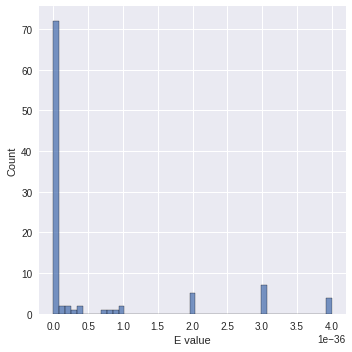

In [13]:
sns.displot(blastp["E value"])

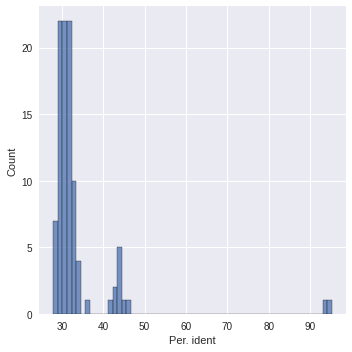

In [14]:
sns.displot(blastp["Per. ident"])